# Investigationg  Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article: https://fivethirtyeight.com/features/fandango-movies-ratings/

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on GitHub(https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- Also a collected movie ratings data for movies released in 2016 and 2017 is publicly available on GitHub (https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

--------
Reading/Understanding Data
---------

In [79]:
import pandas as pd
fand_comp = pd.read_csv('fandango_score_comparison.csv')
movie_1617 = pd.read_csv('movie_ratings_16_17.csv')

In [80]:
fand_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [81]:
movie_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Isolating the columns that offer information about Fandango's ratings:

In [82]:
fand_hickey = fand_comp[['FILM', 'Fandango_Stars', 
                        'Fandango_Ratingvalue', 'Fandango_votes', 
                        'Fandango_Difference']].copy()
fand_new1617 = movie_1617[['movie', 'year', 'fandango']].copy()

In [83]:
fand_hickey.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
91,Paddington (2015),4.5,4.3,4045,0.2
28,Wild Tales (2014),4.5,4.1,235,0.4
84,Sinister 2 (2015),3.5,3.3,973,0.2
118,Infinitely Polar Bear (2015),4.0,3.9,124,0.1
131,Minions (2015),4.0,4.0,14998,0.0


In [84]:
fand_new1617.sample(5)

,movie,year,fandango
195,The Shallows,2016,4.0
206,Warcraft,2016,4.0
80,Inferno,2016,3.5
24,Blair Witch,2016,3.0
140,Rogue One: A Star Wars Story,2016,4.5


-------
Sampling Conditons of Data
--------

From Hickey's article and from the README.md of the data set's repository (https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 201

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository https://github.com/mircealex/Movie_ratings_2016_17):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

So for both data the samples are not random aand are subject to trends. Therefore, for this project (based on teh data available) we can only focus on "popular movies", i.e., movies with 30 or more fan ratings on Fandango released in 2015 and 2016 (movies in "fand1617" are mostly popular movies as well).

-------
Isolating Samples We Need
-----------

Isolating movies that are released in 2015 and 2016:

In [85]:
fand_hickey['year'] = fand_hickey['FILM'].str.extract(r'.*\((.*)\).*'
                                                      , expand=True)

In [86]:
fand_hickey['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [87]:
fand_hickey15 = fand_hickey[fand_hickey['year']=='2015']

In [88]:
fand_new1617['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [89]:
fand_new16 = fand_new1617[fand_new1617['year']==2016]

In [90]:
fand_hickey15.sample(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
49,Terminator Genisys (2015),4.5,4.2,6272,0.3,2015
82,Blackhat (2015),3.0,2.8,1430,0.2,2015
67,Unfriended (2015),3.0,2.7,2507,0.3,2015
131,Minions (2015),4.0,4.0,14998,0.0,2015
122,Tangerine (2015),4.0,3.9,36,0.1,2015


In [91]:
fand_new16.sample(5)

,movie,year,fandango
29,Cabin Fever,2016,4.0
99,London Has Fallen,2016,4.5
21,Before the Flood,2016,3.5
136,Resident Evil: The Final Chapter,2016,4.0
151,Suicide Squad,2016,4.0


----
Comparing Distribution Shapes for 2015 and 2016
-----------


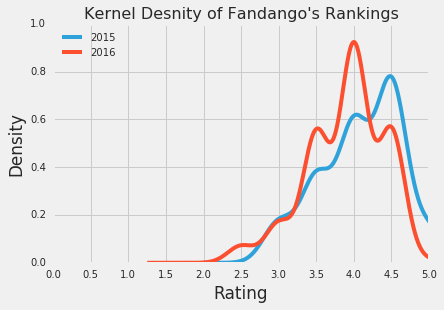

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
fand_hickey15['Fandango_Stars'].plot.kde()
fand_new16['fandango'].plot.kde()
plt.title('Kernel Desnity of Fandango\'s Rankings', fontsize=16)
plt.legend(['2015', '2016'], loc='upper left')
plt.xlabel('Rating')
plt.xlim((0,5))
plt.xticks(np.arange(0,5.5,0.5))
plt.show()

In [93]:
print(' 2015 rating: ',round(fand_hickey15['Fandango_Stars'].mean(),2), '\n',
     '2016 rating: ',round(fand_new16['fandango'].mean(),2))

 2015 rating:  4.09 
 2016 rating:  3.89


Based on the results above, one can conclude that the distribution of the rankings in 2016 is shifted to the lower values (the average ranking decreased by about 0.2 points). However, the ratings remain high in 2016 as in 2015 (see left-skewed distributions for both years)

------------
Comparing Relative Frequencies and Summary Statistics
------------

In [94]:
comp = pd.DataFrame()
comp[2015] = round(fand_hickey15['Fandango_Stars']
                   .value_counts(normalize=True).sort_index()*100,1)
comp[2016] = round(fand_new16['fandango']
                   .value_counts(normalize=True).sort_index()*100,1)

In [95]:
comp

,2015,2016
3.0,8.5,7.3
3.5,17.8,24.1
4.0,28.7,40.3
4.5,38.0,24.6
5.0,7.0,0.5


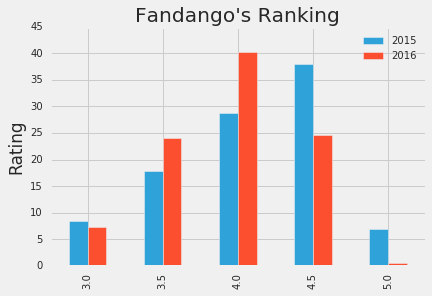

In [96]:
comp.plot.bar()
plt.ylabel('Frequency')
plt.ylabel('Rating')
plt.title('Fandango\'s Ranking')
plt.show()

Same conclusion as above! See the decrease in frequencies of the movies with ranking of 4.5 and 5.0.

In [137]:
stat = pd.DataFrame()

stat.loc['mean', '2015'] = fand_hickey15['Fandango_Stars'].mean()
stat.loc['median', '2015'] = fand_hickey15['Fandango_Stars'].median()
stat.loc['mode', '2015'] = fand_hickey15['Fandango_Stars'].mode()[0]

stat.loc['mean', '2016'] = fand_new16['fandango'].mean()
stat.loc['median', '2016'] = fand_new16['fandango'].median()
stat.loc['mode', '2016'] = fand_new16['fandango'].mode()[0]


In [138]:
stat

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


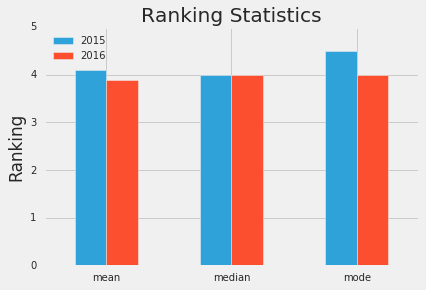

In [139]:
stat.plot.bar()
plt.ylim(0,5)
plt.title('Ranking Statistics')
plt.ylabel('Ranking')
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.show()

Conclusion: Both Mode and Mean for 2016 is higher than 2015 (median is the same). it might be that Fandango has fixed the biased rating system after Hickey's analysis.